In [1]:
import matplotlib.pyplot as plt
from Complexe import Complexe
from Gestion_Image import Calcul_Valeur_Sommet, Import_Image_Fixe_Dim
import time
import numpy as np
import gudhi as gd


# test
from scipy.integrate import odeint
import gudhi.representations
from mpl_toolkits.mplot3d import Axes3D

In [2]:
"""
Data input  
""" 

I, J = 50,50
#file_name = "image_o2.png"
file_name = "spot_blanc.png"
image_black_scaled = Import_Image_Fixe_Dim([I,J], file = file_name, bruit = 0.03)
Valeur_0 = Calcul_Valeur_Sommet(image_black_scaled)

In [3]:
"""
Calcul 
""" 

# Initialisation d'un complexe cubique uniforme sur la grille I, J.
tps1 = time.perf_counter()
comp = Complexe()
comp.Init_Rectangle(I,J)
tps2 = time.perf_counter()


# Calcul du Champs gradient.
tps3 = time.perf_counter()
CG = comp.Calcul_Champs_Gradient(Valeur_0)
tps4 = time.perf_counter()


# Simplification des cellules critiques qui ce touchent.
tps5 = time.perf_counter()
CG.Epsilon_Simplification()
tps6 = time.perf_counter()


# On calcul le compexe de Morse-Smale.
tps7 = time.perf_counter()
MS = CG.Calcul_Complexe_De_Morse()
tps8 = time.perf_counter()


# Filtration de Morse
tps9 = time.perf_counter()
dgm = MS.Filtration()
tps10 = time.perf_counter()

In [4]:
"""
Temps d'execution
""" 

print('Pour I, J = ', I, J)
print('Temps initialisation du complexe :    ', tps2 - tps1, ' secondes')
print('Temps calcul du champ gradient :      ', tps4 - tps3, ' secondes')
print('Temps simplification epsilon :        ', tps6 - tps5, ' secondes')
print('Temps calcul du complexex de Morse :  ', tps8 - tps7, ' secondes')
print('Temps filtration :                    ', tps10 - tps9, ' secondes')

Pour I, J =  50 50
Temps initialisation du complexe :     0.06767270000000014  secondes
Temps calcul du champ gradient :       61.397973199999996  secondes
Temps simplification epsilon :         0.2864174999999989  secondes
Temps calcul du complexex de Morse :   18.481351000000004  secondes
Temps filtration :                     0.07009580000000426  secondes


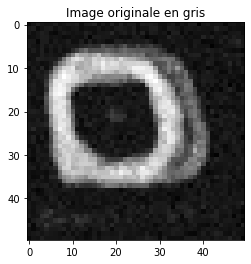

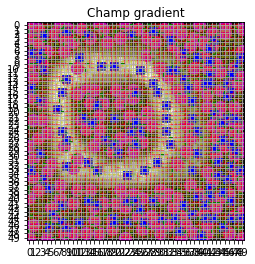

180  cellules critiques de dimension  0
297  cellules critiques de dimension  1
118  cellules critiques de dimension  2


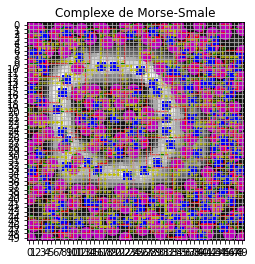

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

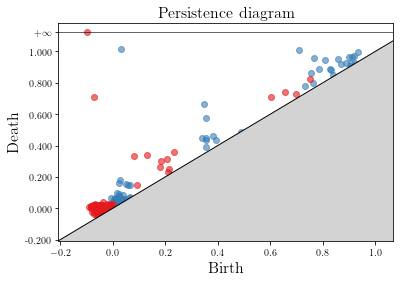

In [5]:
"""
Affichage
""" 

# Affichage de l'image
plt.imshow(image_black_scaled, cmap='gray')
plt.title('Image originale en gris')
plt.show()


# Affichage du champs gradient avec l'image.
CG.Affichage(image_black_scaled)


# Affichage du nombre de cellules critiques 
Liste_Cell_Crit = CG.Get_Cell_Crit()
for d in range(len(Liste_Cell_Crit)):
    print(len(Liste_Cell_Crit[d]), ' cellules critiques de dimension ', d)
    

# Affichage du complexe de Morse-Smale avec l'image.
MS.Affichage(image_black_scaled)


# Affichage diagramme de persistance
gd.plot_persistence_diagram(dgm)